## Ethereum Dataset

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df_ethereum_clean = pd.read_csv("/content/drive/MyDrive/ethereum.csv")
df_ethereum_clean.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,% Day Change ETH,Max Difference ETH,Close ETH
0,2017-11-09,0.039654,22.395996,320.884003
1,2017-11-10,-0.066791,30.175995,299.252991
2,2017-11-11,0.053904,21.261017,314.681000
3,2017-11-12,-0.021551,20.640015,307.907990
4,2017-11-13,0.031564,21.390015,316.716003


# Baseline Ethereum Model Process

Source Used

https://towardsdatascience.com/the-complete-guide-to-time-series-forecasting-using-sklearn-pandas-and-numpy-7694c90e45c1

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

Cleaning the data

In [ ]:
df_ethereum_clean

df = df_ethereum_clean.dropna().copy()
df

,Date,% Day Change ETH,Max Difference ETH,Close ETH
0,2017-11-09,0.039654,22.395996,320.884003
1,2017-11-10,-0.066791,30.175995,299.252991
2,2017-11-11,0.053904,21.261017,314.681000
3,2017-11-12,-0.021551,20.640015,307.907990
4,2017-11-13,0.031564,21.390015,316.716003
...,...,...,...,...
1825,2022-11-08,-0.150156,315.356690,1332.835571
1826,2022-11-09,-0.174742,252.457885,1100.169800
1827,2022-11-10,0.181216,248.668579,1299.464600
1828,2022-11-11,-0.008978,90.965698,1287.221069


In [ ]:
df["ETH SHIFT"] = df["Close ETH"].shift(-1)

Shift all the columns so the prediction would be the next column

Building our train and test datas our train would be 2019-2021, and our test data would be 2021-2020

In [ ]:
train = df[700:1450]
test = df[1450:1900]
test = test.drop(test.tail(1).index)

In [ ]:
train

,Date,% Day Change ETH,Max Difference ETH,Close ETH,ETH SHIFT
700,2019-10-10,-0.007927,5.590454,191.659668,182.569687
701,2019-10-11,-0.048130,13.656967,182.569687,180.826645
702,2019-10-12,-0.009354,6.320053,180.826645,182.075150
703,2019-10-13,0.006711,4.758758,182.075150,186.960907
704,2019-10-14,0.027097,5.641342,186.960907,181.406067
...,...,...,...,...,...
1445,2021-10-24,-0.020124,218.609131,4087.903076,4217.876953
1446,2021-10-25,0.032673,164.632324,4217.876953,4131.102051
1447,2021-10-26,-0.020448,182.307618,4131.102051,3930.257324
1448,2021-10-27,-0.048864,368.895508,3930.257324,4287.318848


Make our test data based on the most reecent year 2022 and as you see predictions are shifted

In [ ]:
test = test.copy()
test["baseline_predictions_ETH"] = test["Close ETH"]
test

,Date,% Day Change ETH,Max Difference ETH,Close ETH,ETH SHIFT,baseline_predictions_ETH
1450,2021-10-29,0.029394,184.027832,4414.746582,4325.650391,4414.746582
1451,2021-10-30,-0.020070,174.354492,4325.650391,4288.074219,4325.650391
1452,2021-10-31,-0.008020,215.433594,4288.074219,4324.626953,4288.074219
1453,2021-11-01,0.008491,216.355469,4324.626953,4584.798828,4324.626953
1454,2021-11-02,0.060682,311.261719,4584.798828,4607.193848,4584.798828
...,...,...,...,...,...,...
1824,2022-11-07,-0.002179,54.059815,1568.591309,1332.835571,1568.591309
1825,2022-11-08,-0.150156,315.356690,1332.835571,1100.169800,1332.835571
1826,2022-11-09,-0.174742,252.457885,1100.169800,1299.464600,1100.169800
1827,2022-11-10,0.181216,248.668579,1299.464600,1287.221069,1299.464600


Function that basically shifts more than one column

In [ ]:
def window_input(window_length: int, data: pd.DataFrame) -> pd.DataFrame:
    
    df = data.copy()
    
    i = 1
    while i < window_length:
        df[f'x_{i}'] = df['Close ETH'].shift(-i)
        i = i + 1
        
    if i == window_length:
        df['y'] = df['Close ETH'].shift(-i)
        
    # Drop rows where there is a NaN
    df = df.dropna(axis=0)
        
    return df

Shifts the data 4 rows

In [ ]:
new_df = window_input(5, df_ethereum_clean)
new_df

,Date,% Day Change ETH,Max Difference ETH,Close ETH,x_1,x_2,x_3,x_4,y
0,2017-11-09,0.039654,22.395996,320.884003,299.252991,314.681000,307.907990,316.716003,337.631012
1,2017-11-10,-0.066791,30.175995,299.252991,314.681000,307.907990,316.716003,337.631012,333.356995
2,2017-11-11,0.053904,21.261017,314.681000,307.907990,316.716003,337.631012,333.356995,330.924011
3,2017-11-12,-0.021551,20.640015,307.907990,316.716003,337.631012,333.356995,330.924011,332.394012
4,2017-11-13,0.031564,21.390015,316.716003,337.631012,333.356995,330.924011,332.394012,347.612000
...,...,...,...,...,...,...,...,...,...
1819,2022-11-02,-0.037851,106.165894,1519.711792,1531.541748,1645.093384,1627.968018,1572.234741,1568.591309
1820,2022-11-03,0.007776,39.657959,1531.541748,1645.093384,1627.968018,1572.234741,1568.591309,1332.835571
1821,2022-11-04,0.074243,132.066284,1645.093384,1627.968018,1572.234741,1568.591309,1332.835571,1100.169800
1822,2022-11-05,-0.010448,34.522217,1627.968018,1572.234741,1568.591309,1332.835571,1100.169800,1299.464600


Splitting our data into testing and training data

In [ ]:
from sklearn.model_selection import train_test_split

X = new_df[['Close ETH', 'x_1', 'x_2', 'x_3', 'x_4']].values
y = new_df['y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

Applying a Baseline Model Predictor Model to predict the values

In [ ]:
baseline_pred = []

for row in X_test:
    baseline_pred.append(np.mean(row))

Function to output a model of predictions

In [ ]:
def window_input_output(input_length: int, output_length: int, data: pd.DataFrame) -> pd.DataFrame:
    
    df = data.copy()
    
    i = 1
    while i < input_length:
        df[f'x_{i}'] = df["Close ETH"].shift(-i)
        i = i + 1
        
    j = 0
    while j < output_length:
        df[f'y_{j}'] = df["Close ETH"].shift(-output_length-j)
        j = j + 1
        
    df = df.dropna(axis=0)
    
    return df

Predicting a sequence of 365 values or a year



In [ ]:
seq_df = window_input_output(365, 365, df_ethereum_clean)
seq_df

<ipython-input-112-5709ff65f261>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'x_{i}'] = df["Close ETH"].shift(-i)
<ipython-input-112-5709ff65f261>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'y_{j}'] = df["Close ETH"].shift(-output_length-j)


,Date,% Day Change ETH,Max Difference ETH,Close ETH,x_1,x_2,x_3,x_4,x_5,x_6,...,y_355,y_356,y_357,y_358,y_359,y_360,y_361,y_362,y_363,y_364
0,2017-11-09,0.039654,22.395996,320.884003,299.252991,314.681000,307.907990,316.716003,337.631012,333.356995,...,184.692169,183.966919,183.969894,183.925720,182.425018,186.355194,189.304169,191.593842,187.976547,184.211472
1,2017-11-10,-0.066791,30.175995,299.252991,314.681000,307.907990,316.716003,337.631012,333.356995,330.924011,...,183.966919,183.969894,183.925720,182.425018,186.355194,189.304169,191.593842,187.976547,184.211472,185.028717
2,2017-11-11,0.053904,21.261017,314.681000,307.907990,316.716003,337.631012,333.356995,330.924011,332.394012,...,183.969894,183.925720,182.425018,186.355194,189.304169,191.593842,187.976547,184.211472,185.028717,189.477280
3,2017-11-12,-0.021551,20.640015,307.907990,316.716003,337.631012,333.356995,330.924011,332.394012,347.612000,...,183.925720,182.425018,186.355194,189.304169,191.593842,187.976547,184.211472,185.028717,189.477280,185.489639
4,2017-11-13,0.031564,21.390015,316.716003,337.631012,333.356995,330.924011,332.394012,347.612000,354.385986,...,182.425018,186.355194,189.304169,191.593842,187.976547,184.211472,185.028717,189.477280,185.489639,186.843414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2020-11-08,0.040935,24.626679,453.554779,444.163055,449.679626,462.960541,461.005280,474.626434,460.149841,...,1619.698486,1590.783325,1572.714478,1579.704590,1519.711792,1531.541748,1645.093384,1627.968018,1572.234741,1568.591309
1096,2020-11-09,-0.020749,22.185730,444.163055,449.679626,462.960541,461.005280,474.626434,460.149841,447.559082,...,1590.783325,1572.714478,1579.704590,1519.711792,1531.541748,1645.093384,1627.968018,1572.234741,1568.591309,1332.835571
1097,2020-11-10,0.012413,14.158234,449.679626,462.960541,461.005280,474.626434,460.149841,447.559082,459.940308,...,1572.714478,1579.704590,1519.711792,1531.541748,1645.093384,1627.968018,1572.234741,1568.591309,1332.835571,1100.169800
1098,2020-11-11,0.029534,24.053924,462.960541,461.005280,474.626434,460.149841,447.559082,459.940308,480.360077,...,1579.704590,1519.711792,1531.541748,1645.093384,1627.968018,1572.234741,1568.591309,1332.835571,1100.169800,1299.464600


Splitting the data again 

In [ ]:
X_cols = [col for col in seq_df.columns if col.startswith('x')]

X_cols.insert(0, "Close ETH")

y_cols = [col for col in seq_df.columns if col.startswith('y')]
X_train = seq_df[X_cols][:-2].values
y_train = seq_df[y_cols][:-2].values

X_test = seq_df[X_cols][-2:].values
y_test = seq_df[y_cols][-2:].values

In [ ]:
X_test[1][::-1]

array([4730.384277, 4636.174316, 4735.068848, 4812.087402, 4620.554688,
       4521.581055, 4486.243164, 4537.324219, 4607.193848, 4584.798828,
       4324.626953, 4288.074219, 4325.650391, 4414.746582, 4287.318848,
       3930.257324, 4131.102051, 4217.876953, 4087.903076, 4171.663574,
       3970.181885, 4054.322754, 4155.992188, 3877.650879, 3748.760254,
       3847.104492, 3830.38208 , 3862.634766, 3786.01416 , 3606.20166 ,
       3492.573242, 3545.354004, 3425.852783, 3575.716797, 3563.759277,
       3587.974854, 3580.562012, 3518.518555, 3380.089111, 3418.358643,
       3391.694336, 3307.516113, 3001.678955, 2853.143311, 2807.296631,
       2934.138916, 3062.265381, 2925.565674, 2931.669189, 3155.523682,
       3077.86792 , 2764.431152, 2958.993408, 3329.447998, 3432.018311,
       3398.538818, 3571.294922, 3615.282715, 3429.169678, 3285.511719,
       3410.134521, 3270.278076, 3211.505859, 3427.340088, 3497.315186,
       3426.394287, 3928.379395, 3952.133545, 3887.828369, 3940.

Plotted the data showing the Baseline Model vs Actual Price

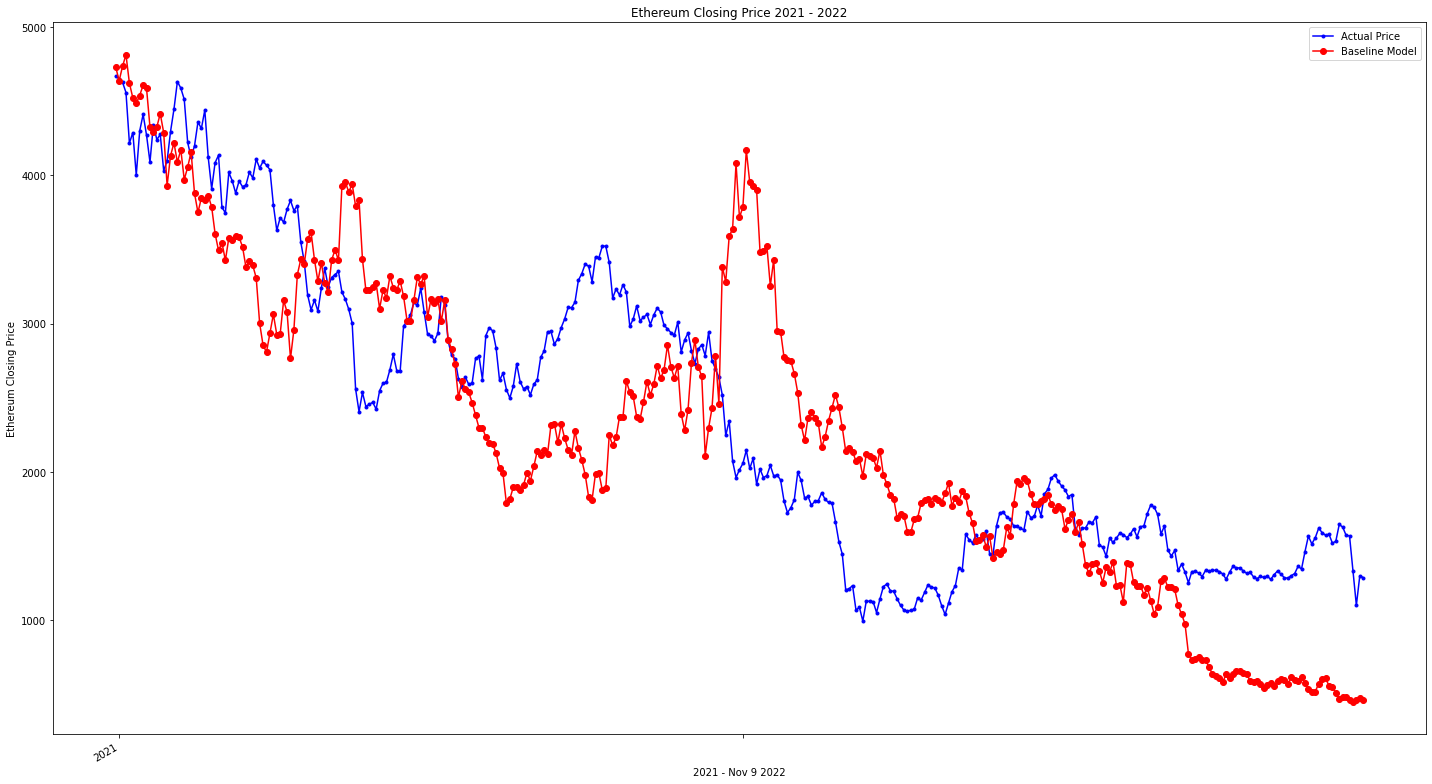

In [ ]:
fig, ax = plt.subplots(figsize=(20, 11))
ax.plot(np.arange(0, 365, 1), y_test[1], marker='.', color='blue', label='Actual Price')
ax.plot(np.arange(0, 365, 1), X_test[1][::-1], marker='o', color='red', label='Baseline Model')

ax.set_title("Ethereum Closing Price 2021 - 2022")
ax.set_xlabel('2021 - Nov 9 2022')
ax.set_ylabel('Ethereum Closing Price')
plt.xticks(np.arange(1, 365, 182), np.arange(2021, 2022, 1))
plt.legend(loc=1)
fig.autofmt_xdate()
plt.tight_layout()
